In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [28]:
raw_data = pd.read_csv('03-DummyVariables.csv')

In [29]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,NO
1,1664,2.52,NO
2,1760,2.54,NO
3,1685,2.74,NO
4,1693,2.83,NO
...,...,...,...
79,1936,3.71,YES
80,1810,3.71,YES
81,1987,3.73,YES
82,1962,3.76,YES


In [30]:
data = raw_data.copy()

In [31]:
data['Attendance'] = data['Attendance'].map({'YES':1, 'NO':0})

In [32]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,1
82,1962,3.76,1


In [33]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.428571
std,104.530661,0.271617,0.497844
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [34]:
y = data['GPA']
x1 =data[['SAT', 'Attendance']]

In [35]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     67.82
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           4.97e-18
Time:                        20:19:35   Log-Likelihood:                 32.114
No. Observations:                  84   AIC:                            -58.23
Df Residuals:                      81   BIC:                            -50.93
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3214      0.360      3.673      0.000       0.606       2.037
SAT            0.0010      0.000      5.134      0.000       0.001       0.001
Attendance     0.2885      0.042      6.905      0.000       0.205       0.372
==============================================================================
Omnibus:                       35.651   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.636
Skew:                          -1.488   Prob(JB):                     4.18e-19
Kurtosis:                       6.915   Cond. No.                     3.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

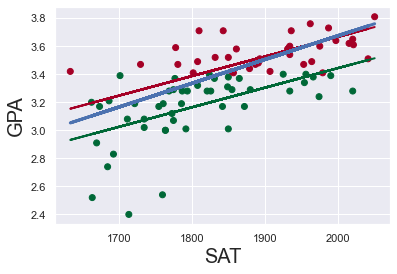

In [36]:
plt.scatter(data['SAT'], y, c = data['Attendance'], cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
yhat = 0.0017*data['SAT'] + 0.275
fig = plt.plot(data['SAT'], yhat_no, lw = 2, c='#006837', label='regression line 1')
fig = plt.plot(data['SAT'], yhat_yes, lw = 2, c='#a50026', label='regression line 2')
fig = plt.plot(data['SAT'], yhat, lw = 3, c='#4c72b0', label='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## How To Make Predictions Based On Regression

In [37]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,1
82,1.0,1962,1


In [38]:
new_data = pd.DataFrame({'const':1, 'SAT': [1700, 1670], 'Attendance':[0, 1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [39]:
new_data.rename(index = {0:'Bob', 1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [40]:
predictions = results.predict(new_data)
predictions

0    3.058175
1    3.316045
dtype: float64

In [41]:
predictionsdf = pd.DataFrame({'Predictions': predictions})
joined = new_data.join(predictionsdf)
joined.rename(index = {0:'Bob', 1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.058175
Alice,1,1670,1,3.316045
